In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sympy as smp
from scipy.integrate import quad_vec

%matplotlib inline

plt.style.use(['science', 'notebook', 'grid'])

In [2]:
s, ds = smp.symbols('s ds')
type(s)

sympy.core.symbol.Symbol

In [3]:
r_dl = smp.Matrix([smp.cos(s), smp.sin(s), 0])
r_dl

Matrix([
[cos(s)],
[sin(s)],
[     0]])

In [4]:
r_dl_prime = smp.diff(r_dl)
r_dl_prime

Matrix([
[-sin(s)],
[ cos(s)],
[      0]])

In [5]:
r_p = smp.Matrix([0, 0, 0])
r_p

Matrix([
[0],
[0],
[0]])

In [6]:
r_p_dl = r_p - r_dl
r_p_dl[0]

-cos(s)

In [7]:
db = (r_dl_prime.cross(r_p_dl)/(r_p_dl.norm())**3)
type(db)

sympy.matrices.dense.MutableDenseMatrix

In [8]:
db_f = smp.lambdify([s], db)
db_f

<function _lambdifygenerated(s)>

In [9]:
quad_vec(db_f, 0, 2*np.pi)[0]

array([[0.        ],
       [0.        ],
       [6.28318531]])

In [13]:
from vecs_and_curves import *

In [14]:
s, ds = smp.symbols('s ds')

r_dl = Vector(smp.cos(s), smp.sin(s), 0)
r_dl_prime = r_dl.differentiate()

r_p = Vector(0, 0, 0)
r_p_dl = r_p - r_dl

db = (r_dl_prime.cross(r_p_dl)/(r_p_dl.norm() ** 3))
db = Vector(db[0], db[1], db[2])

db_f = db.convert_to_function(s)   
b = integrate_function(db_f, [0, 2*np.pi])


/tmp/ipykernel_6001/1899192305.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


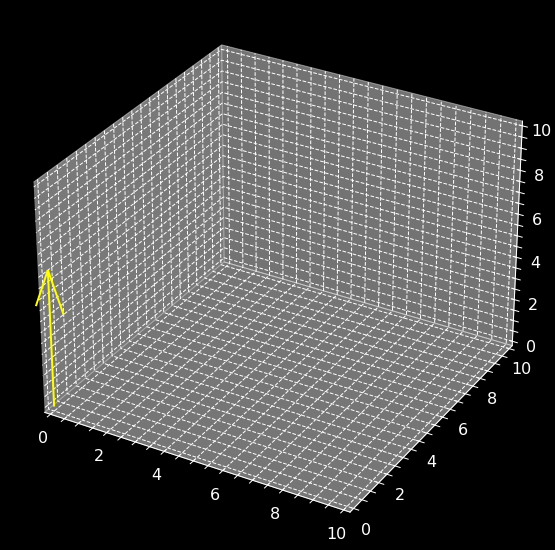

In [15]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca(projection='3d')

r_p = np.array([0, 0, 0])

ax.quiver(r_p[0], r_p[1], r_p[2], b[0], b[1], b[2], color = 'yellow')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()

In [28]:
t = np.linspace(0, 2*np.pi, 500)

curve = Curve(np.cos(40*t), np.sin(40*t), 0.1*t, t)

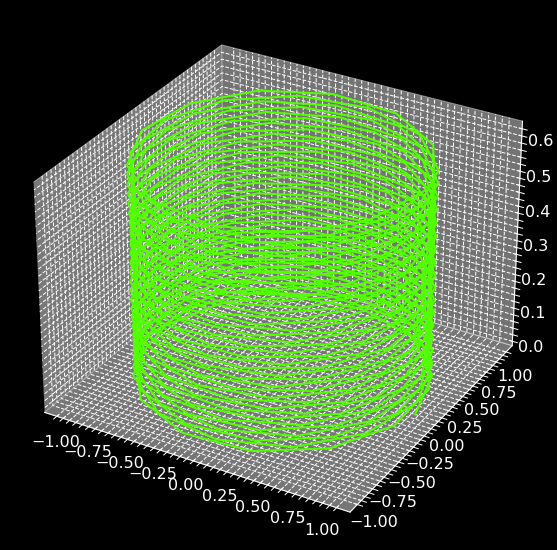

In [29]:
curve.plot_curve()